# Exchange-Rate Dataset

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df =pd.read_csv('exchange-rate-twi.csv')
df.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [9]:
df.tail()

,Month,Exchange Rate TWI
299,300,49.6
300,301,48.5
301,302,48.4
302,303,51.0
303,304,53.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              304 non-null    int64  
 1   Exchange Rate TWI  304 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


In [14]:
#What will be the forecast of all future values using the Simple average method? 
#(up to 2 decimal places). Use the first 212 rows as the train data set.
round(np.mean(df['Exchange Rate TWI'].iloc[:212]),2)

88.33

In [16]:
#making up a train data 
train=df['Exchange Rate TWI'].iloc[:212]
train.head()

0    100.0
1     99.6
2     99.4
3     99.1
4     99.2
Name: Exchange Rate TWI, dtype: float64

In [19]:
#What will be the forecast of all future values using the Naive method? Use the first 212 rows as the train data set.
train[-1:]

211    52.0
Name: Exchange Rate TWI, dtype: float64

In [20]:
#What is the RMSE and MAPE values of the Simple Average Forecasting forecasting method? Use the first 212 rows as the train data set.
test = df[212:]
test.head()

,Month,Exchange Rate TWI
212,213,52.5
213,214,53.1
214,215,53.8
215,216,55.2
216,217,58.9


In [24]:
#simple average method
y_hat_average = test.copy()
y_hat_average['average_forecast'] = np.mean(train)

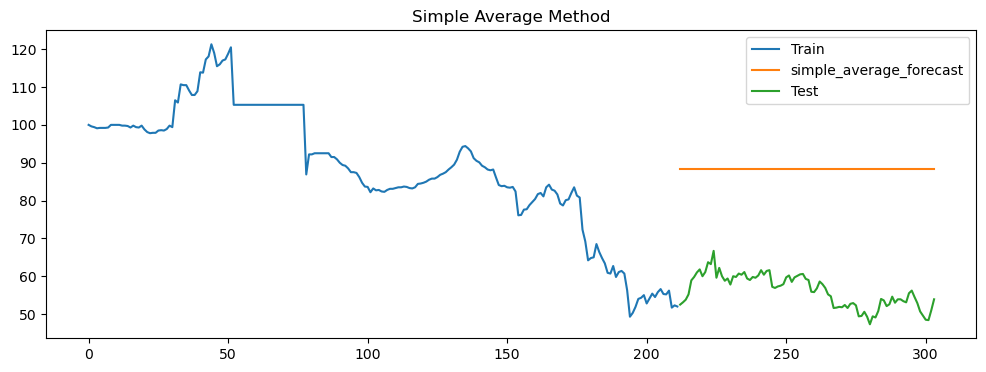

In [29]:
#plotting the graph
plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(y_hat_average['average_forecast'],label='simple_average_forecast')
plt.plot(test['Exchange Rate TWI'],label='Test')
plt.title('Simple Average Method')
plt.legend(loc='best')
plt.show(block=False)

In [36]:
#Calculating the RMSE and MAPE of the simple average method
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_average['average_forecast']))
mape=np.mean((np.abs(test['Exchange Rate TWI']-y_hat_average['average_forecast']))/test['Exchange Rate TWI']*100)
print("RMSE:",rmse)
print("MAPE:",mape)

RMSE: 32.41792673296435
MAPE: 58.11716235655414


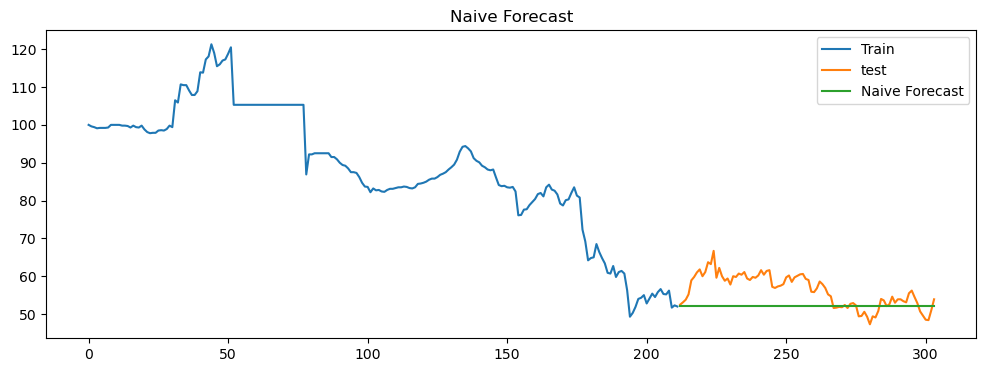

In [48]:
#plotting the naive method also to check the performance
y_hat_naive=test.copy()
y_hat_naive['naive_forecast'] = train.iloc[-1]
plt.figure(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test['Exchange Rate TWI'],label='test')
plt.plot(y_hat_naive['naive_forecast'],label='Naive Forecast')
plt.title('Naive Forecast')
plt.legend(loc='best')
plt.show()

- Since the simple average is overforecasting the values we can choose naive forecast to be the best here.

In [50]:
## Lets compare the rmse and mape for the naive forecast also
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_naive['naive_forecast']))
mape = np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test['Exchange Rate TWI']*100)
print("RMSE:",rmse)
print("MAPE:",mape)

RMSE: 5.983755182739057
MAPE: 8.406052283180601


- By comparing both the rmse and mape values we can see that for the naive method it is significantly lower in comparison to that of the simple average method.

In [51]:
# What is the accuracy of Naive forecasting method? Use the first 212 rows as the train data set.
#Hint: Accuracy=1-MAPE
Accuracy = 100-mape
Accuracy

91.5939477168194

In [53]:
train.shape

(212,)

### Simple moving average

In [57]:
y_hat_sma = df.copy()
y_hat_sma['sma_forecast'] = df['Exchange Rate TWI'].rolling(12).mean()
y_hat_sma['sma_forecast'][212:] = y_hat_sma['sma_forecast'][211]

In [64]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_sma['sma_forecast'][212:]))
mape = round(np.mean((np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][212:]))/test['Exchange Rate TWI']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 4.661162968336478
MAPE: 6.96


In [65]:
#Implement the Simple Moving Average forecasting method and answer the following questions. Use the first 212 rows as train data for each question in this section.

#What is the RMSE and MAPE value for a 6 months window?
y_hat_sma = df.copy()
y_hat_sma['sma_forecast'] = df['Exchange Rate TWI'].rolling(6).mean()
y_hat_sma['sma_forecast'][212:] = y_hat_sma['sma_forecast'][211]

In [66]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_sma['sma_forecast'][212:]))
mape = round(np.mean((np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][212:]))/test['Exchange Rate TWI']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 4.903110764512882
MAPE: 7.13


In [67]:
#moving average window 3
y_hat_sma = df.copy()
y_hat_sma['sma_forecast'] = df['Exchange Rate TWI'].rolling(3).mean()
y_hat_sma['sma_forecast'][212:] = y_hat_sma['sma_forecast'][211]
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'],y_hat_sma['sma_forecast'][212:]))
mape = round(np.mean((np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][212:]))/test['Exchange Rate TWI']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 5.983755182739057
MAPE: 8.41


### ADF test

In [71]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Exchange Rate TWI'])

print('ADF_statistic %f:'%adf_test[0])
print('Critical value @0.05:%0.2f' %adf_test[4]['5%'])
print('p-value :%0.3f' %adf_test[1])

ADF_statistic -0.805468:
Critical value @0.05:-2.87
p-value :0.818


- Comparing the p value we fail to reject the null hypothesis. The time series is not stationary.

### KPSS test

In [79]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Exchange Rate TWI'])

print('KPSS-statistic:%0.3f'%kpss_test[0])
print('Critical_value @0.05:%0.3f' %kpss_test[3]['5%'])
print('p-value: %.3f' %kpss_test[1])

KPSS-statistic:2.614
Critical_value @0.05:0.463
p-value: 0.010


- Comparing the p value we see that we reject the null hypothesis and the time series is not stationary.

### Box Cox Transformation